# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [5]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [6]:
athletes = pd.read_csv("athletes.csv")
REJECT_H0 = False
ALPHA = 0.05

In [9]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [35]:
# Sua análise começa aqui.
heights = get_sample(athletes, 'height', n=3000)

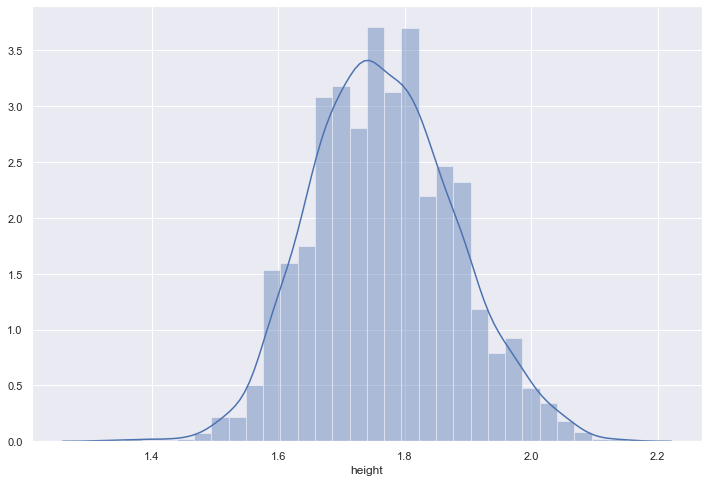

In [19]:
sns.distplot(heights, bins=30)

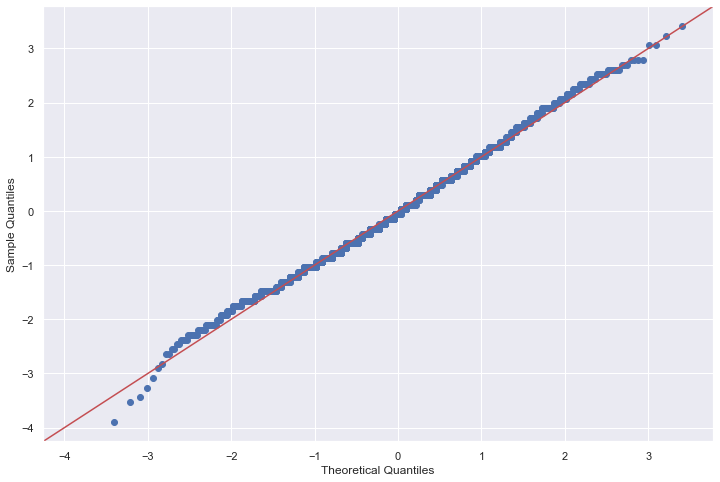

In [13]:
#import statsmodels.api as sm
#sm.qqplot(heights, fit=True, line="45");

In [36]:
sct.shapiro(heights)

(0.9961519837379456, 5.681722541339695e-07)

In [37]:
sct.jarque_bera(heights)

(13.03363513594265, 0.001478366424594868)

In [46]:
weights = get_sample(athletes, 'weight', n=3000)
sct.normaltest(weights)

1.5898922918029537e-111

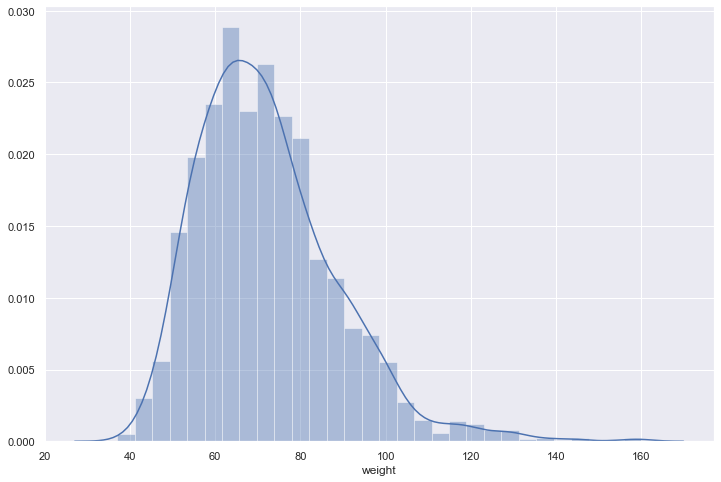

In [41]:
sns.distplot(weights, bins=30)

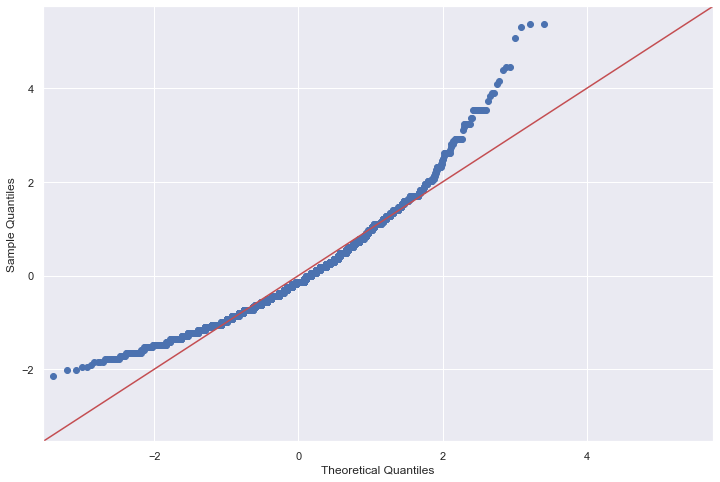

In [44]:
#sm.qqplot(weights, line="45", fit=True);

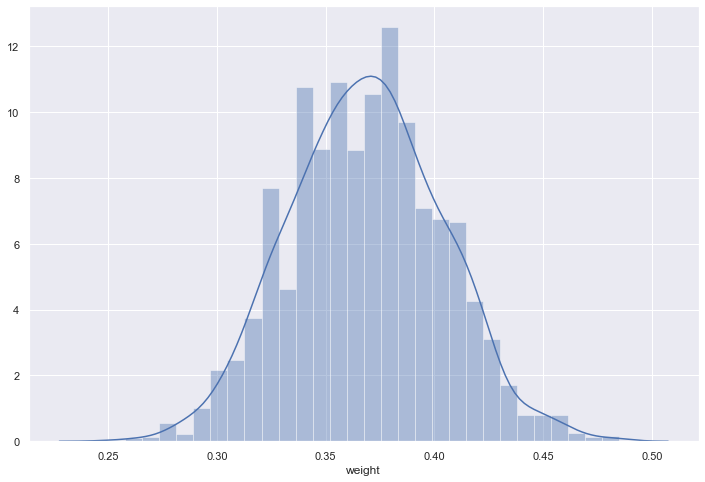

In [60]:
logged_weight = np.log(weights)
logged_weight = np.log(logged_weight)
logged_weight = np.log(logged_weight)
sns.distplot(logged_weight, bins=30)

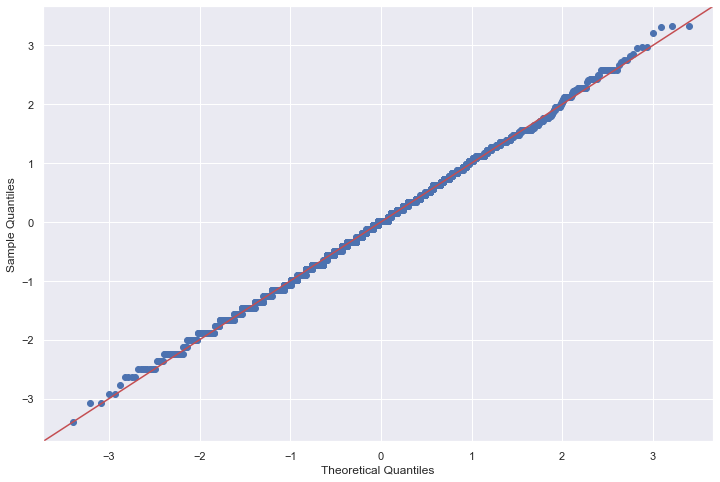

In [61]:
#sm.qqplot(logged_weight, fit=True, line="45");

In [62]:
sct.normaltest(logged_weight)

NormaltestResult(statistic=2.6251493553337095, pvalue=0.26912625025828113)

In [87]:
# estudos da questão 5
bra = athletes[athletes['nationality'] == 'BRA']
bra_smp_height = get_sample(bra, 'height')
usa = athletes[athletes['nationality'] == 'USA']
usa_smp_height = get_sample(usa, 'height')
bra_smp_height, usa_smp_height

[[10992    1.86
  742      1.85
  3255     1.83
  1718     1.59
  1868     1.88
           ... 
  6437     1.82
  4486     1.70
  4415     1.58
  10256    1.90
  6797     1.60
  Name: height, Length: 100, dtype: float64],
 [8499    1.80
  6037    1.68
  3030    1.63
  1678    1.91
  5911    1.81
          ... 
  1601    1.71
  9449    1.73
  5841    1.76
  7547    1.94
  1528    1.88
  Name: height, Length: 100, dtype: float64]]

In [75]:
sct.ttest_ind(bra_smp_height, usa_smp_height, equal_var=False)

Ttest_indResult(statistic=-2.397291376770201, pvalue=0.01748528165217272)

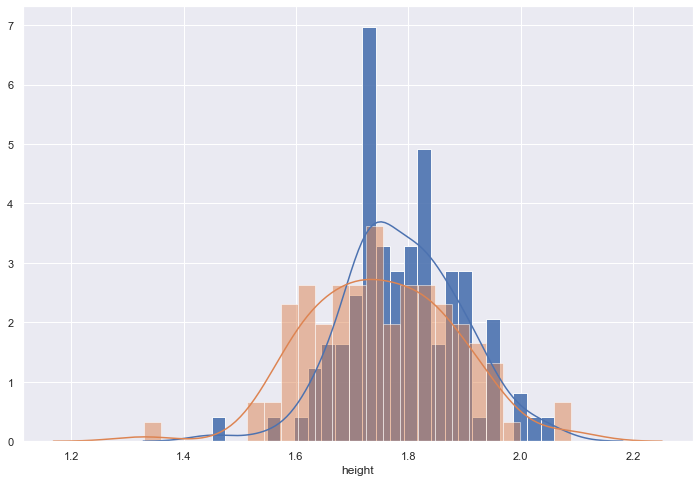

In [85]:
sns.distplot(usa_smp_height, bins=25, label='USA', hist_kws={"alpha": 0.9});
sns.distplot(bra_smp_height, bins=25, label='BRA', hist_kws={"alpha": 0.5});

In [88]:
# testes para a questao 6 

bra = athletes[athletes['nationality'] == 'BRA']
bra_smp_height = get_sample(bra, 'height')
can = athletes[athletes['nationality'] == 'CAN']
can_smp_height = get_sample(can, 'height')

sct.ttest_ind(bra_smp_height, can_smp_height, equal_var=False)

Ttest_indResult(statistic=-0.1763545967450964, pvalue=0.8601962262079699)

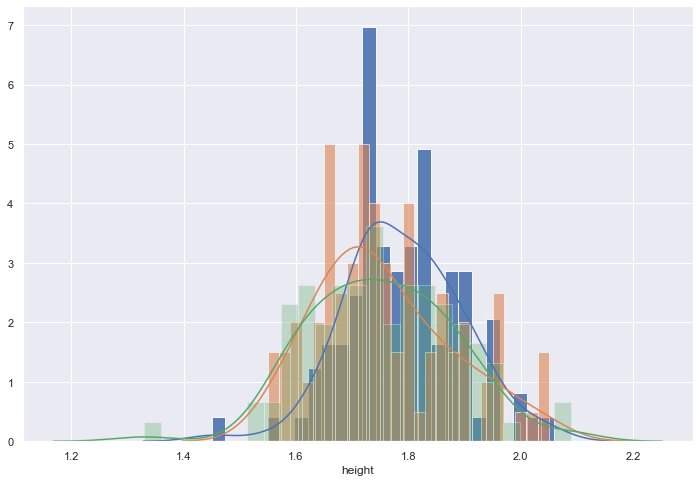

In [92]:
sns.distplot(usa_smp_height, bins=25, label='USA', hist_kws={"alpha": 0.9});
sns.distplot(can_smp_height, bins=25, label='CAN', hist_kws={"alpha": 0.6});
sns.distplot(bra_smp_height, bins=25, label='BRA', hist_kws={"alpha": 0.3});

In [167]:
usa.height.head(usa.height.size-1)

6        2.05
13       1.61
14       1.78
64       1.66
104      1.73
         ... 
11018    1.94
11242    1.86
11339    1.61
11436    1.78
11437    1.94
Name: height, Length: 566, dtype: float64

In [182]:
# testes da questao 7
sct.ttest_ind(usa.height, can.height, equal_var=False, nan_policy='omit')


Ttest_indResult(statistic=3.516987632488539, pvalue=0.0004660129347389851)

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [17]:
def q1():
    # Retorne aqui o resultado da questão 1.
    # REJECT_H0 e ALPHA são globais de valores False e 0.05
    s_heights = get_sample(athletes, 'height', n=3000)
    p_value = sct.shapiro(s_heights)[1]
    is_normal = not REJECT_H0 if p_value > ALPHA else REJECT_H0

    return is_normal

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [64]:
def q2():
    # Retorne aqui o resultado da questão 2.
    # REJECT_H0 e ALPHA são globais de valores False e 0.05
    s_height = get_sample(athletes, 'height', n=3000)
    p_value = sct.jarque_bera(s_height)[1]
    is_normal = not REJECT_H0 if p_value > ALPHA else REJECT_H0

    return is_normal

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [65]:
def q3():
    # Retorne aqui o resultado da questão 3.
    # REJECT_H0 e ALPHA são globais de valores False e 0.05
    s_weight = get_sample(athletes, "weight", n=3000)
    p_value = sct.normaltest(s_weight)[1]
    is_normal = not REJECT_H0 if p_value > ALPHA else REJECT_H0

    return is_normal

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [67]:
def q4():
    # Retorne aqui o resultado da questão 4.
    # REJECT_H0 e ALPHA são globais de valores False e 0.05
    s_weight = get_sample(athletes, "weight", n=3000)
    s_weight_log = np.log(s_weight)
    p_value = sct.normaltest(s_weight_log)[1]
    is_normal = not REJECT_H0 if p_value > ALPHA else REJECT_H0

    return is_normal

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [10]:
def q5():
    # Retorne aqui o resultado da questão 5.
    # REJECT_H0 e ALPHA são globais de valores False e 0.05
    bra = athletes[athletes['nationality'] == 'BRA']
    bra_smp_height = get_sample(bra, 'height')
    usa = athletes[athletes['nationality'] == 'USA']
    usa_smp_height = get_sample(usa, 'height')
   
    p_value = sct.ttest_ind(bra_smp_height, usa_smp_height, equal_var=False)[1]
    is_normal = not REJECT_H0 if p_value > ALPHA else REJECT_H0

    return is_normal

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [96]:
def q6():
    # Retorne aqui o resultado da questão 6.
    # REJECT_H0 e ALPHA são globais de valores False e 0.05
    bra = athletes[athletes['nationality'] == 'BRA']
    bra_smp_height = get_sample(bra, 'height')
    can = athletes[athletes['nationality'] == 'CAN']
    can_smp_height = get_sample(can, 'height')

    p_value = sct.ttest_ind(bra_smp_height, 
                            can_smp_height, 
                            equal_var=False)[1]
    is_normal = not REJECT_H0 if p_value > ALPHA else REJECT_H0

    return is_normal

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [183]:
def q7():
    # Retorne aqui o resultado da questão 7.
    usa = athletes[athletes['nationality'] == 'USA']
    can = athletes[athletes['nationality'] == 'CAN']
    
    p_value = sct.ttest_ind(usa.height, 
                            can.height, 
                            equal_var=False, 
                            nan_policy='omit')[1]
    
    return float(p_value.round(8))

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?